In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')
sample = pd.read_csv('spaceship-titanic/sample_submission.csv')
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1903,2040_01,Europa,True,B/85/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,0.0,0.0,Lesaten Stiven,True
7167,7647_01,Earth,False,G/1240/S,TRAPPIST-1e,24.0,False,0.0,7.0,127.0,639.0,37.0,Eulah Lopelases,False
7095,7563_01,Mars,True,F/1570/P,55 Cancri e,39.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
2729,2928_02,Europa,True,B/92/P,TRAPPIST-1e,51.0,False,0.0,0.0,NaN,0.0,0.0,Photope Caltilter,True
2285,2455_01,Mars,False,F/471/S,TRAPPIST-1e,42.0,False,554.0,0.0,1168.0,0.0,275.0,Naish Muste,False


In [3]:
print('Train missing values:')
print(train.isna().sum())
print('Test missing values:')
print(test.isna().sum())

Train missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Test missing values:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [4]:
print('Unique values in Train')
print(train.nunique())
print('Unique values in Test')
print(test.nunique())

Unique values in Train
PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64
Unique values in Test
PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

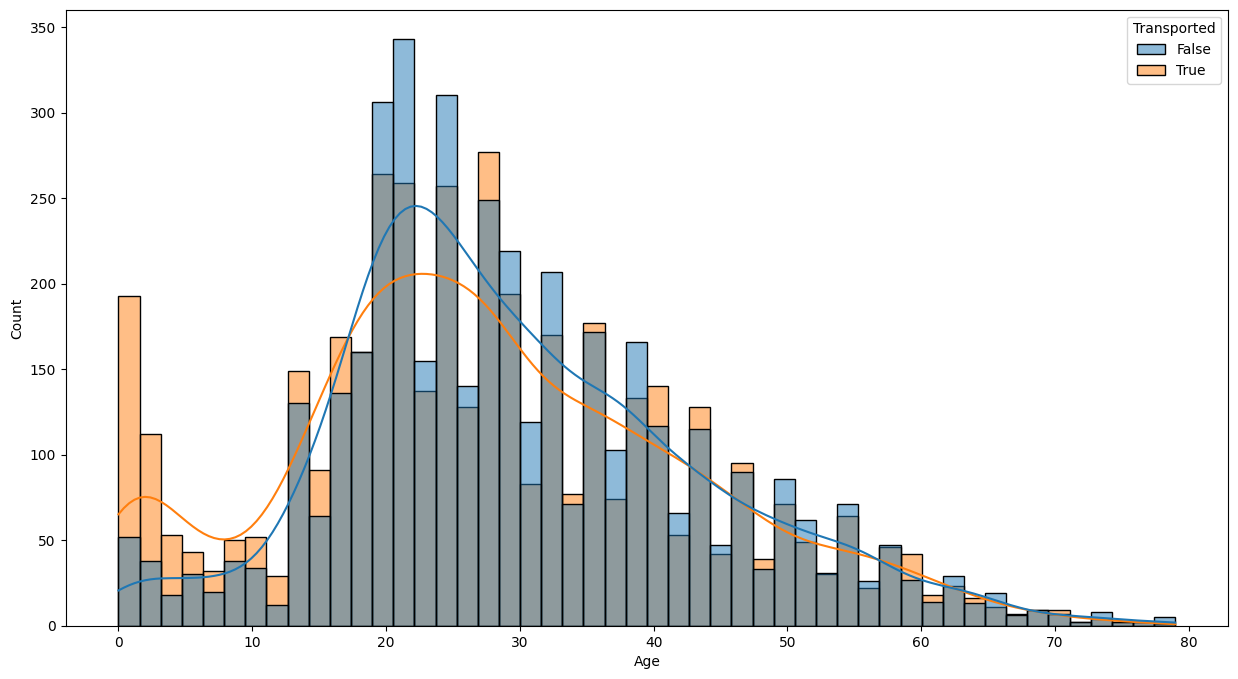

In [5]:
plt.figure(figsize=(15, 8))
sns.histplot(data= train,x= 'Age', hue='Transported', kde=True, bins=50)

* Ages between 0-18 have a higher chance being transported
* Ages between 19-25 have a lower chance of being transported
* Ages above 25+ are equally to be transported

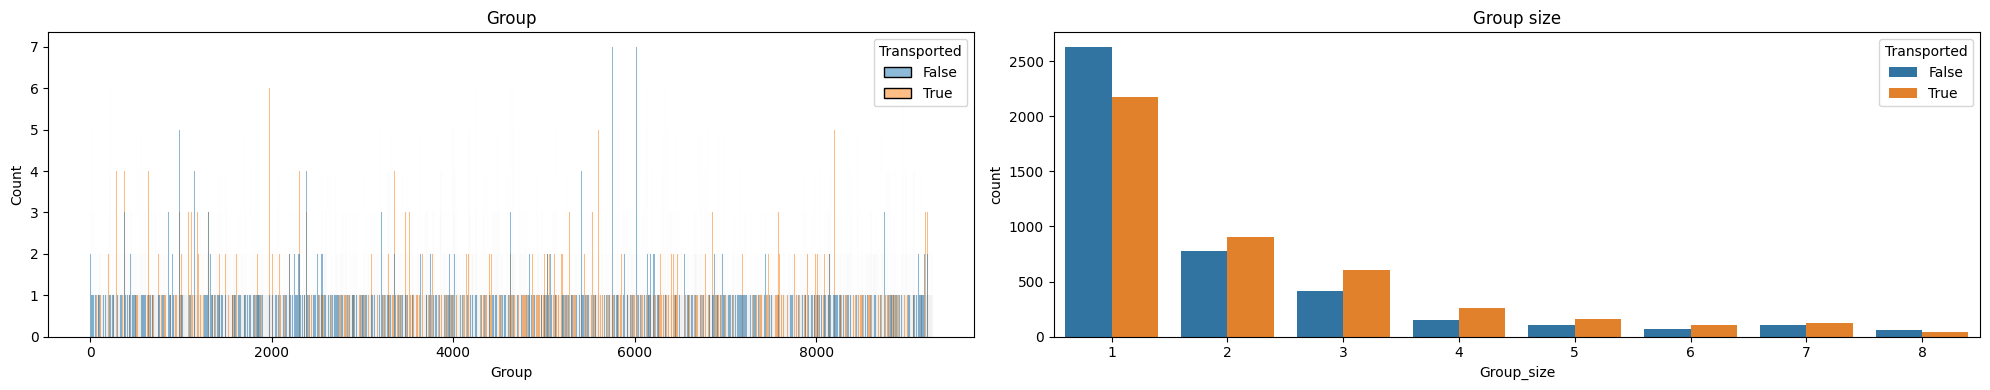

In [6]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
plt.tight_layout()

* if you are in a solo group your chance of teleporation is lower than the other group sizes

<Axes: xlabel='Solo', ylabel='count'>

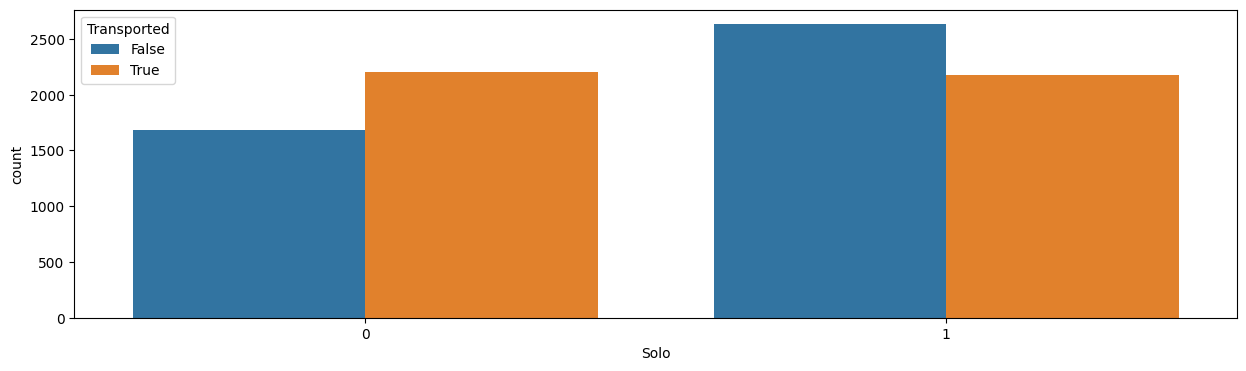

In [7]:
train['Solo'] = (train['Group_size'] == 1).astype(int)
test['Solo'] = (test['Group_size'] == 1).astype(int)

plt.figure(figsize=(15, 4))
sns.countplot(data= train, x='Solo', hue= 'Transported')

In [8]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_size,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,1


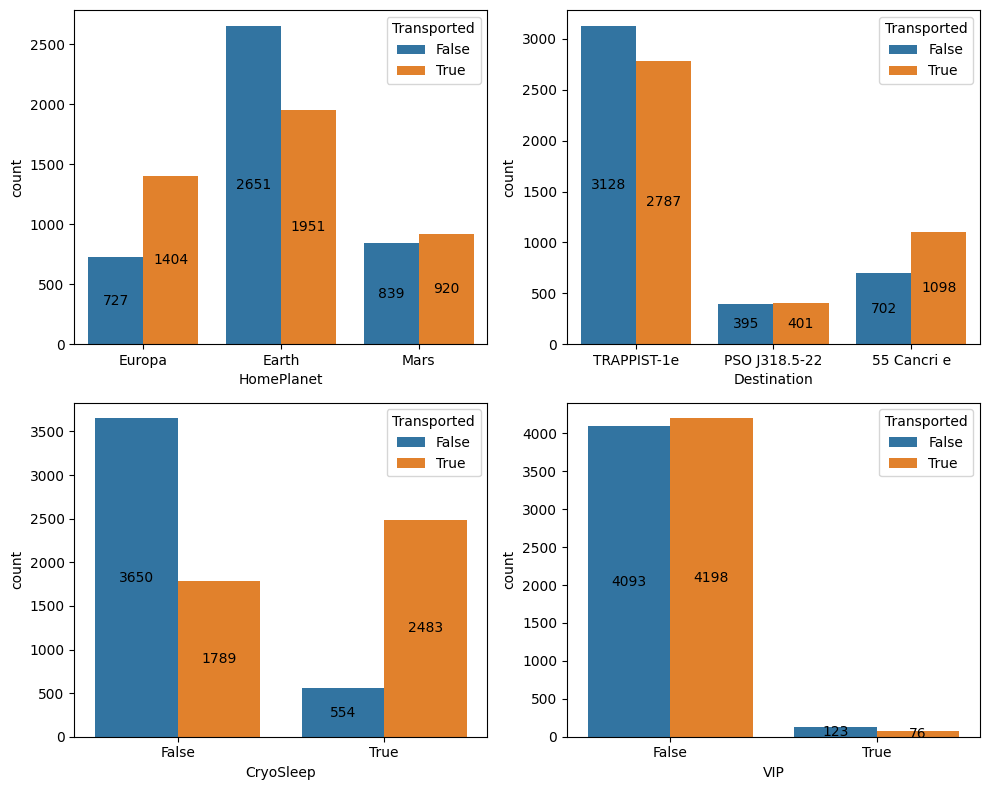

In [9]:
cat_col = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
plt.figure(figsize=(10,8))
for i, col in enumerate(cat_col):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data= train, x= col, hue= 'Transported')
    for container in ax.containers:
        ax.bar_label(container, label_type= 'center')
plt.tight_layout()

* If you are from Earth your chance of being transported is lower
* being VIP doesn't increase your change of being transported
* If you are in CryoSleep your chance of being transported is higher
* Destination matters in being transported 

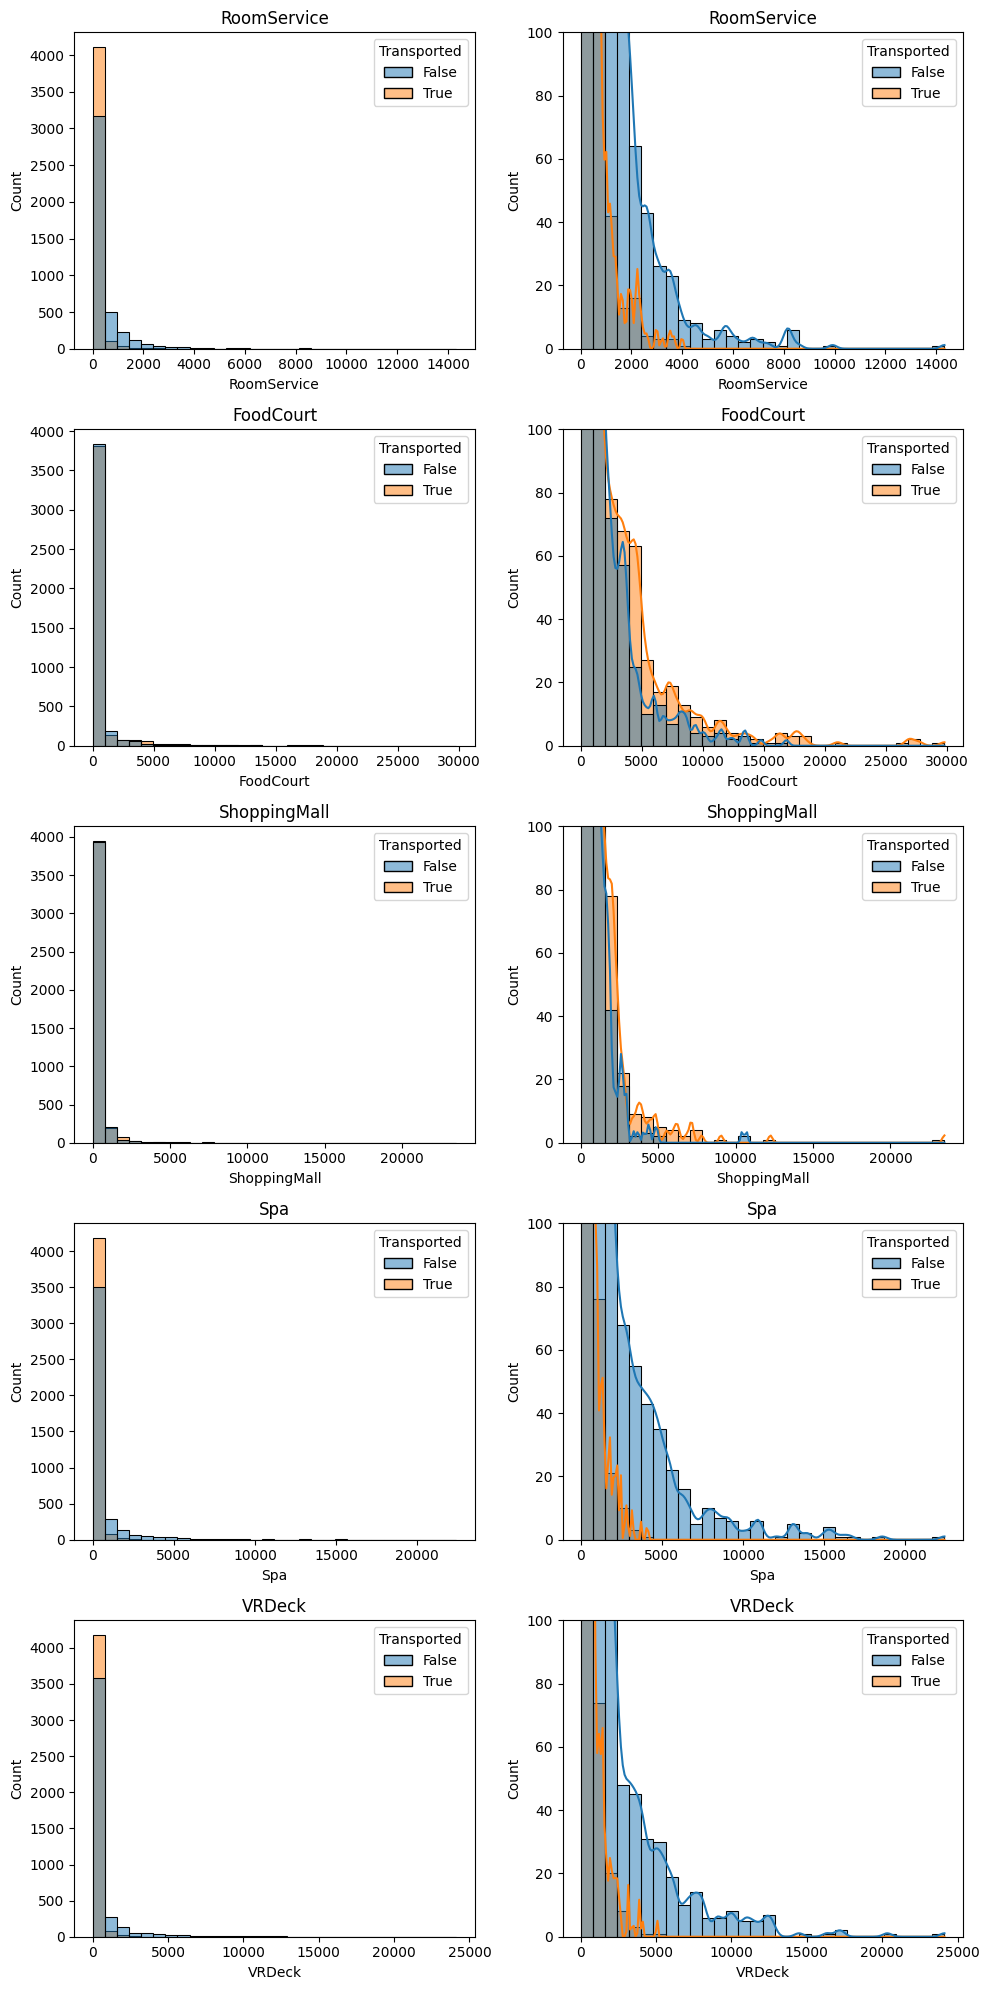

In [10]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, exp in enumerate(exp_feats):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=exp, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(exp)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=exp, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(exp)

plt.tight_layout()

* People who dont spend any money have higher chance of being transported

<Axes: xlabel='No_spending', ylabel='count'>

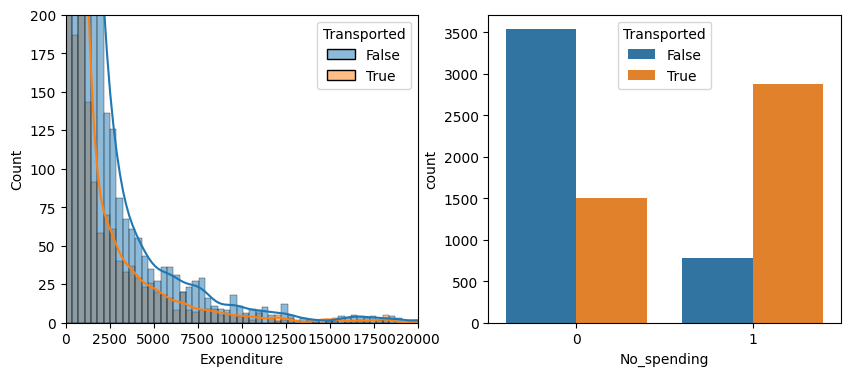

In [11]:
train['Expenditure'] = train[exp_feats].sum(axis= 1)
train['No_spending'] = (train['Expenditure'] == 0).astype(int)

test['Expenditure'] = test[exp_feats].sum(axis= 1)
test['No_spending'] = (test['Expenditure'] == 0).astype(int)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1)
sns.histplot(data= train, x= train['Expenditure'], hue= 'Transported', bins= 100, kde= True, axes= ax)
plt.ylim([0, 200])
plt.xlim([0,20000])

ax= fig.add_subplot(1, 2, 2)
sns.countplot(data= train, x= train['No_spending'], hue= 'Transported', axes= ax)

In [12]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Group_size        0
Solo              0
Expenditure       0
No_spending       0
dtype: int64

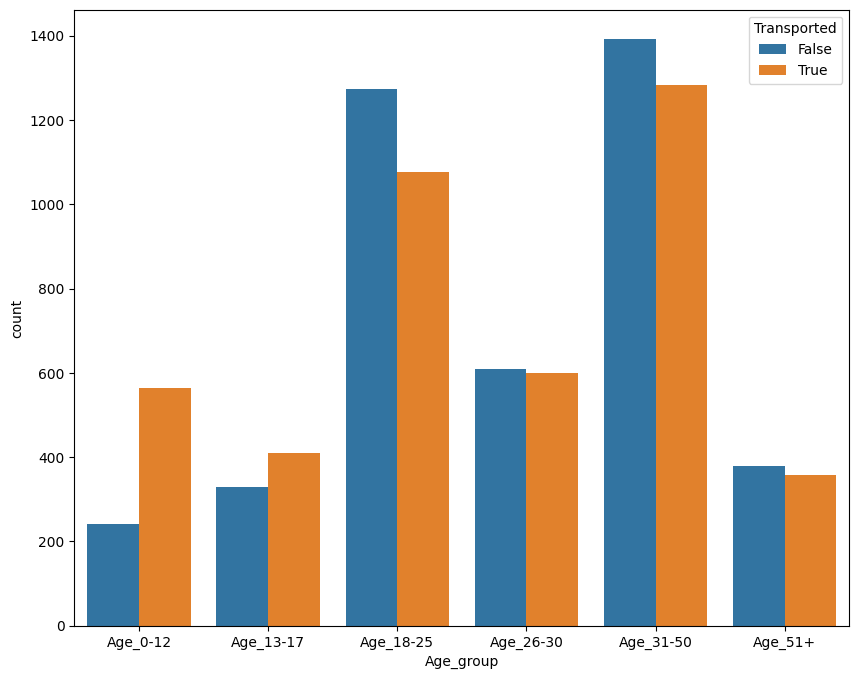

In [13]:
train['Age_group'] = np.nan

train.loc[train['Age'] <= 12, 'Age_group'] = 'Age_0-12'
train.loc[(train['Age'] >= 13) & (train['Age'] < 18), 'Age_group'] = 'Age_13-17'
train.loc[(train['Age'] >= 18) & (train['Age'] < 26), 'Age_group'] = 'Age_18-25'
train.loc[(train['Age'] >= 26) & (train['Age'] < 31), 'Age_group'] = 'Age_26-30'
train.loc[(train['Age'] >= 31) & (train['Age'] < 51), 'Age_group'] = 'Age_31-50'
train.loc[train['Age'] >= 51, 'Age_group'] = 'Age_51+'

test.loc[train['Age'] <= 12, 'Age_group'] = 'Age_0-12'
test.loc[(test['Age'] >= 13) & (test['Age'] < 18), 'Age_group'] = 'Age_13-17'
test.loc[(test['Age'] >= 18) & (test['Age'] < 26), 'Age_group'] = 'Age_18-25'
test.loc[(test['Age'] >= 26) & (test['Age'] < 31), 'Age_group'] = 'Age_26-30'
test.loc[(test['Age'] >= 31) & (test['Age'] < 51), 'Age_group'] = 'Age_31-50'
test.loc[test['Age'] >= 51, 'Age_group'] = 'Age_51+'

plt.figure(figsize=(10, 8), dpi= 100)
sns.countplot(data= train, x= 'Age_group', hue= 'Transported', order= ['Age_0-12','Age_13-17','Age_18-25','Age_26-30' ,'Age_31-50', 'Age_51+'])
plt.show()

In [14]:
train['Cabin'] = train['Cabin'].fillna('Z/9999/Z')
test['Cabin'] = test['Cabin'].fillna('Z/9999/Z')

train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

train.loc[(train['Cabin_deck'] == 'Z'), 'Cabin_deck'] = np.nan
train.loc[(train['Cabin_number'] == 9999), 'Cabin_number'] = np.nan
train.loc[(train['Cabin_side'] == 'Z'), 'Cabin_side'] = np.nan

test.loc[(test['Cabin_deck'] == 'Z'), 'Cabin_deck'] = np.nan
test.loc[(test['Cabin_number'] == 9999), 'Cabin_number'] = np.nan
test.loc[(test['Cabin_side'] == 'Z'), 'Cabin_side'] = np.nan

train.drop('Cabin', axis= 1, inplace= True)
test.drop('Cabin', axis= 1, inplace= True)

In [15]:
print(train['Cabin_deck'].unique())
print(train['Cabin_side'].unique())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['P' 'S' nan]


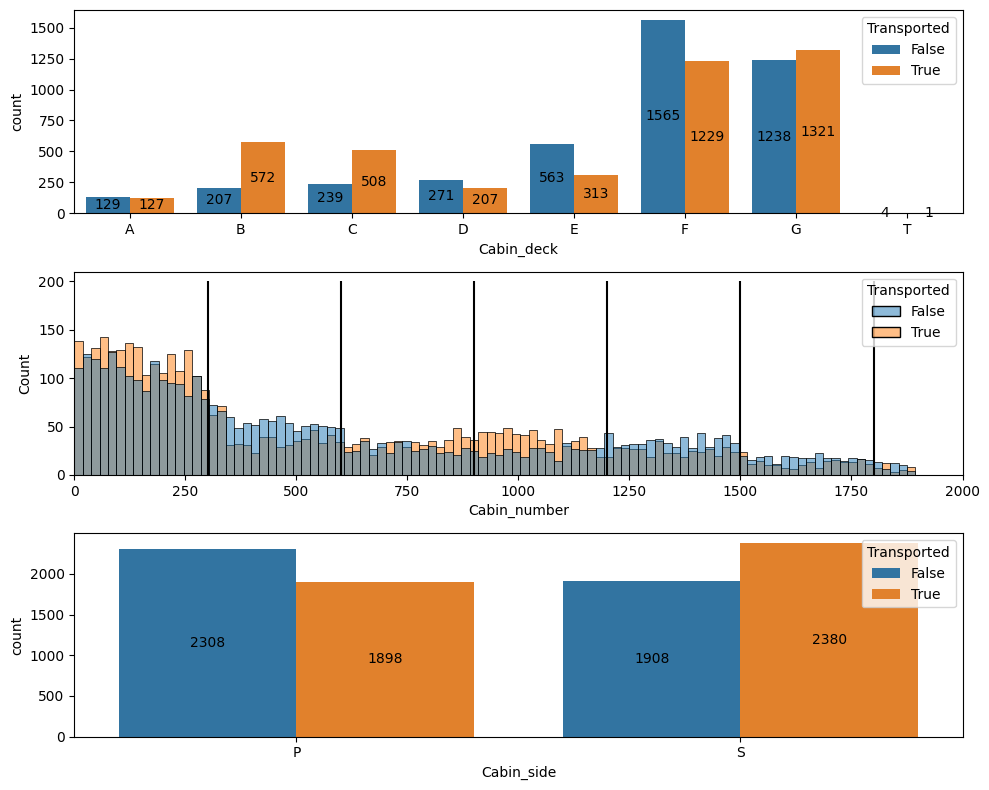

In [16]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
ax = sns.countplot(data= train, x='Cabin_deck', hue= 'Transported', order= ['A','B','C','D','E','F','G','T'])
for container in ax.containers:
    ax.bar_label(container, label_type= 'center')

plt.subplot(3, 1, 2)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
sns.histplot(data= train, x='Cabin_number', hue= 'Transported', bins= 100)
plt.xlim([0,2000])

plt.subplot(3, 1, 3)
ax = sns.countplot(data= train, x='Cabin_side', hue= 'Transported')
for container in ax.containers:
    ax.bar_label(container, label_type= 'center')

plt.tight_layout()
plt.show()

In [17]:
train['Cabin_region1'] = (train['Cabin_number'] < 300).astype(int)
train['Cabin_region2'] = ((train['Cabin_number'] >= 300) & (train['Cabin_number'] < 600)).astype(int)
train['Cabin_region3'] = ((train['Cabin_number'] >= 600) & (train['Cabin_number'] < 900)).astype(int)
train['Cabin_region4'] = ((train['Cabin_number'] >= 900) & (train['Cabin_number'] < 1200)).astype(int)
train['Cabin_region5'] = ((train['Cabin_number'] >= 1200) & (train['Cabin_number'] < 1500)).astype(int)
train['Cabin_region6'] = ((train['Cabin_number'] >= 1500) & (train['Cabin_number'] < 1800)).astype(int)
train['Cabin_region7'] = (train['Cabin_number'] >= 1800).astype(int)

test['Cabin_region1'] = (test['Cabin_number'] < 300).astype(int)
test['Cabin_region2'] = ((test['Cabin_number'] >= 300) & (test['Cabin_number'] < 600)).astype(int)
test['Cabin_region3'] = ((test['Cabin_number'] >= 600) & (test['Cabin_number'] < 900)).astype(int)
test['Cabin_region4'] = ((test['Cabin_number'] >= 900) & (test['Cabin_number'] < 1200)).astype(int)
test['Cabin_region5'] = ((test['Cabin_number'] >= 1200) & (test['Cabin_number'] < 1500)).astype(int)
test['Cabin_region6'] = ((test['Cabin_number'] >= 1500) & (test['Cabin_number'] < 1800)).astype(int)
test['Cabin_region7'] = (test['Cabin_number'] >= 1800).astype(int)

<Axes: xlabel='Cabin_regions_plot', ylabel='count'>

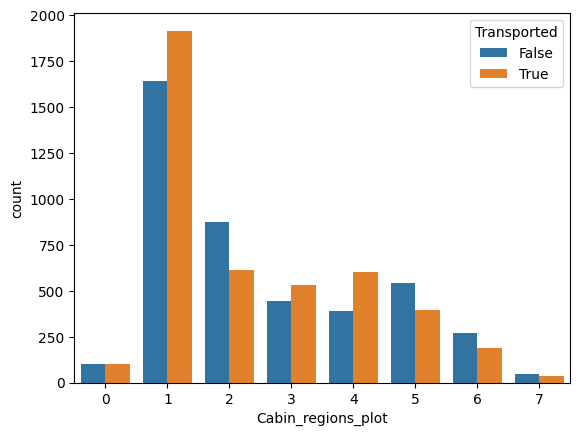

In [18]:
train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
sns.countplot(data= train, x='Cabin_regions_plot', hue='Transported')

In [19]:
train.drop('Cabin_regions_plot', axis=1, inplace= True)

In [20]:
train['Name'].fillna('Unknown Unknown', inplace= True)
test['Name'].fillna('Unknown Unknown', inplace= True)

train['Surname'] = train['Name'].str.split().str[-1]
test['Surname'] = test['Name'].str.split().str[-1]

train['Family_size'] = train['Surname'].map(lambda x: pd.concat([train['Surname'], test['Surname']]).value_counts()[x])
test['Family_size'] = test['Surname'].map(lambda x: pd.concat([train['Surname'], test['Surname']]).value_counts()[x])

In [21]:
train['Family_size'].value_counts().sort_index()

1       133
2       425
3       616
4       805
5       979
6      1009
7       974
8       753
9       763
10      583
11      441
12      344
13      165
14      208
15       98
16       94
17       38
18       43
19       22
294     200
Name: Family_size, dtype: int64

In [22]:
train.loc[(train['Surname'] == 'Unknown'), 'Surname'] = np.nan
train.loc[(train['Family_size'] > 100), 'Family_size'] = np.nan
test.loc[(test['Surname'] == 'Unknown'), 'Surname'] = np.nan
test.loc[(test['Family_size'] > 100), 'Family_size'] = np.nan

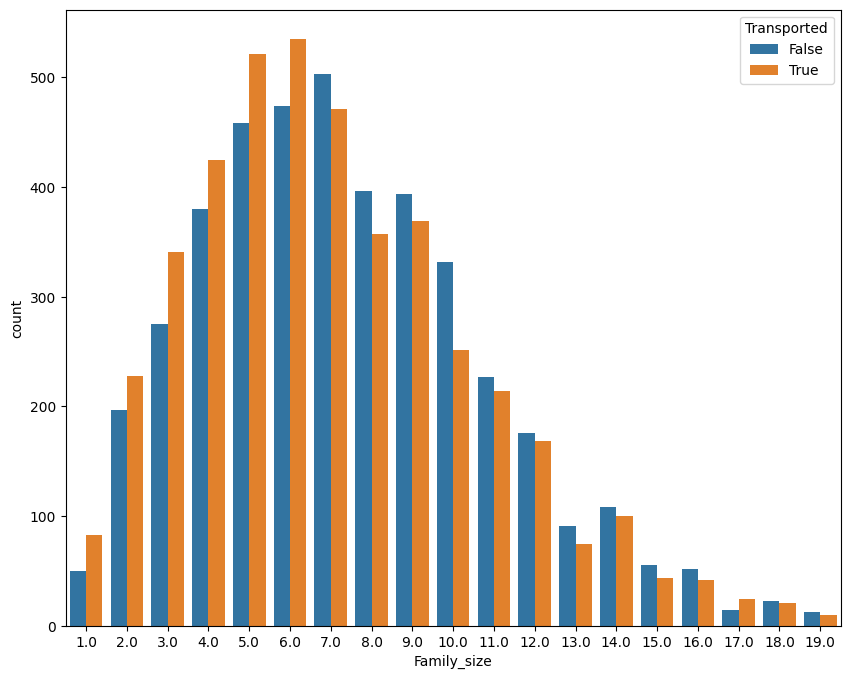

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(data= train, x= 'Family_size', hue= 'Transported')
plt.show()

# Missing Values

In [24]:
X = train.drop('Transported', axis= 1).copy()
y = train['Transported'].copy().astype(int)

In [25]:
data = pd.concat([X, test]).reset_index(drop=True)

In [26]:
na_cols = data.columns[data.isna().any()].tolist()

mv= pd.DataFrame(data[na_cols].isna().sum(), columns= ['Missing_values'])
mv['Percent_missing_values'] = np.round(100*mv['Missing_values']/len(data), 2)
mv

,Missing_values,Percent_missing_values
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


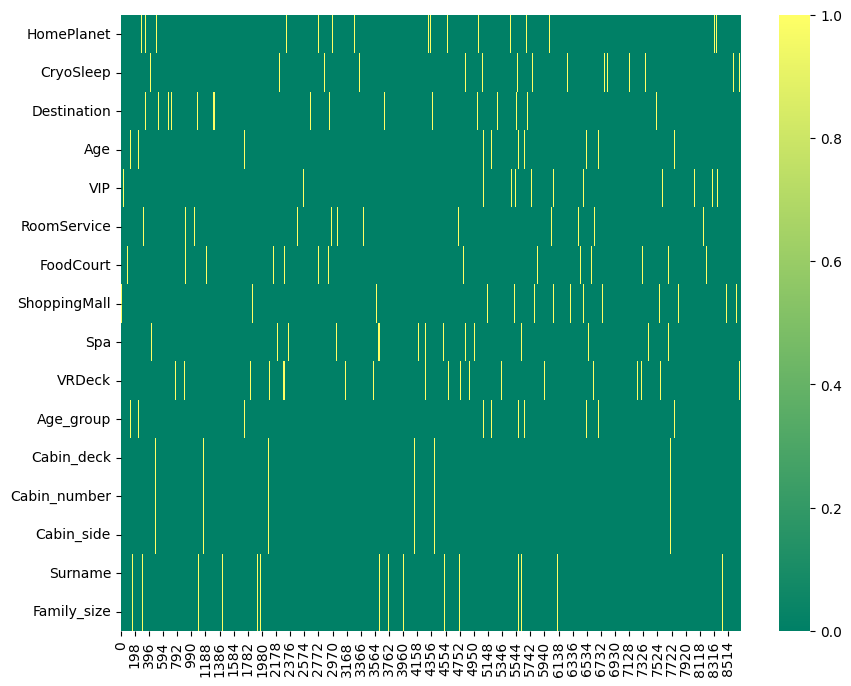

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(train[na_cols].isna().T, cmap='summer')
plt.show()

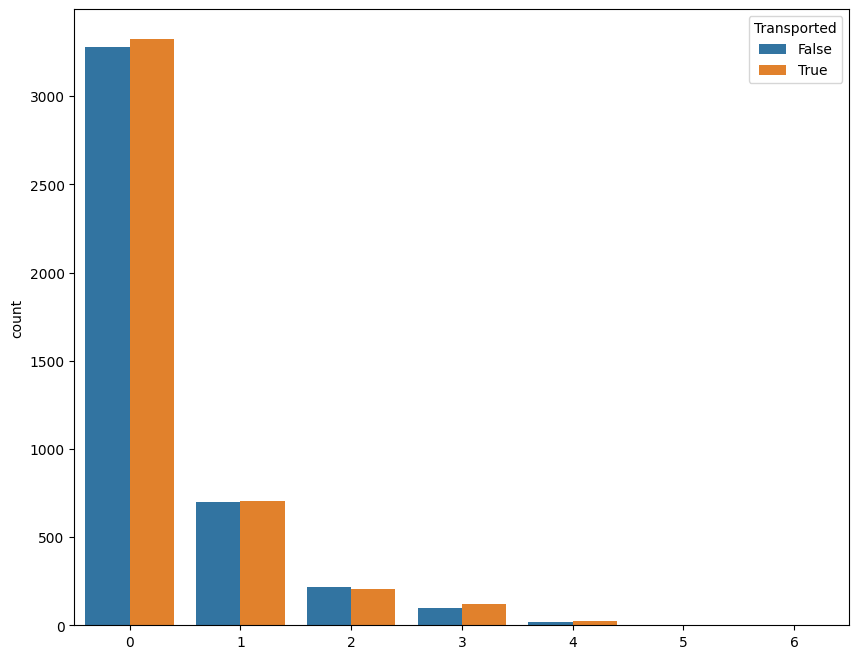

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(data= train, x= train[na_cols].isna().sum(axis= 1), hue='Transported')
plt.show()

* Even though missing values make about 2% of the data but combined they make about 25% of the whole data

In [29]:
group_homeplanet = data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

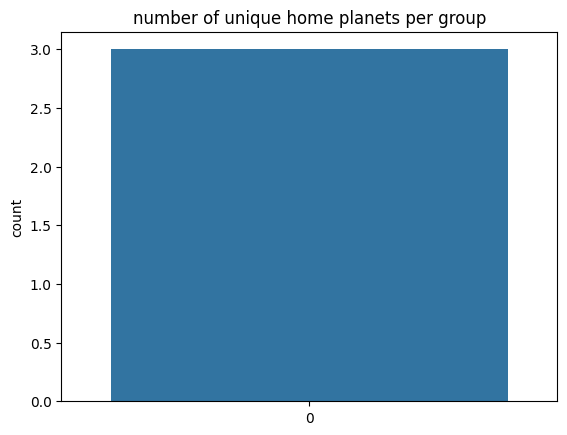

In [30]:
sns.countplot((group_homeplanet > 0).sum())
plt.title('number of unique home planets per group')
plt.show()

* everyone in the same group comes from the same planet

In [31]:
HP_bef=data['HomePlanet'].isna().sum()

group_homeplanet_index = data[data['HomePlanet'].isna() & data['Group'].isin(group_homeplanet.index)].index
data.loc[group_homeplanet_index, 'HomePlanet'] = data.loc[group_homeplanet_index, 'Group'].map(lambda x: group_homeplanet.idxmax(axis= 1)[x])

print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


<Axes: xlabel='Cabin_deck', ylabel='HomePlanet'>

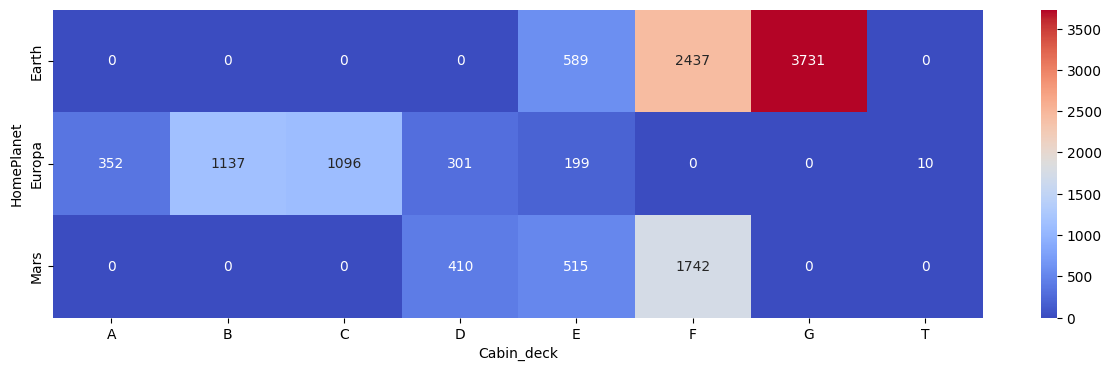

In [32]:
cabinedeck_homeplanet = data.groupby(['Cabin_deck', 'HomePlanet']).size().unstack().fillna(0)

plt.figure(figsize=(15, 4))
sns.heatmap(data = cabinedeck_homeplanet.T, fmt = 'g',annot= True, cmap= 'coolwarm')

* A B C T are all from Europa
* G are all from Earth

In [33]:
HP_bef=data['HomePlanet'].isna().sum()

data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'] == 'G'), 'HomePlanet'] = 'Earth'

print('HomePlanet missing values before:',HP_bef)
print('HomePlanet missing values after:',data['HomePlanet'].isna().sum())

HomePlanet missing values before: 157
HomePlanet missing values after: 94


<Axes: ylabel='count'>

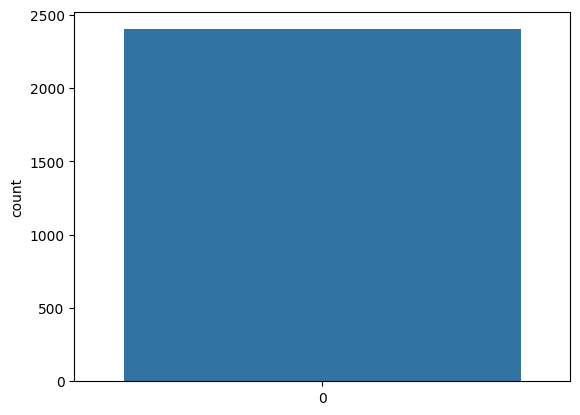

In [34]:
surname_homeplanet = data.groupby(['Surname', 'HomePlanet']).size().unstack().fillna(0)

sns.countplot((surname_homeplanet > 0).sum(axis= 1))

In [35]:
HP_bef=data['HomePlanet'].isna().sum()

surname_homeplanet_index = data[(data['HomePlanet'].isna()) & (data['Surname'].isin(surname_homeplanet.index))].index
data.loc[surname_homeplanet_index, 'HomePlanet'] = data.loc[surname_homeplanet_index, 'Surname'].map(lambda x: surname_homeplanet.idxmax(axis= 1)[x])

print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [36]:
data[data['HomePlanet'].isna()][['Destination', 'HomePlanet']]

,Destination,HomePlanet
2274,TRAPPIST-1e,NaN
2631,TRAPPIST-1e,NaN
3091,TRAPPIST-1e,NaN
4548,TRAPPIST-1e,NaN
5762,TRAPPIST-1e,NaN
8969,TRAPPIST-1e,NaN
10583,TRAPPIST-1e,NaN
11913,TRAPPIST-1e,NaN
12551,TRAPPIST-1e,NaN
12725,TRAPPIST-1e,NaN


<Axes: xlabel='HomePlanet', ylabel='Destination'>

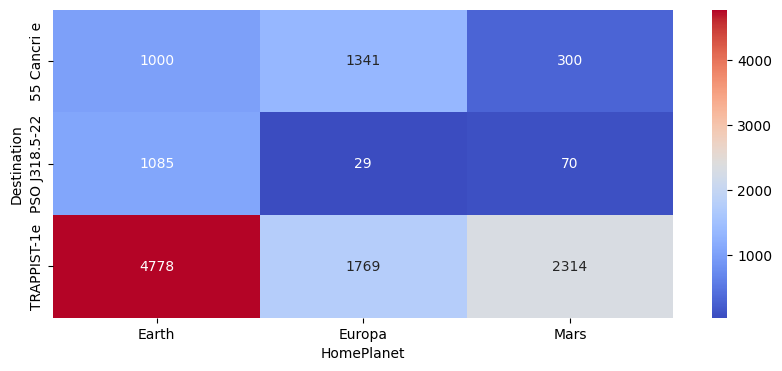

In [37]:
dest_homeplanet = data.groupby(['Destination', 'HomePlanet']).size().unstack().fillna(0)

plt.figure(figsize= (10, 4))
sns.heatmap(data= dest_homeplanet, fmt= 'g', annot= True, cmap= 'coolwarm')

In [38]:
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'] != 'D'), 'HomePlanet'] = 'Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'] == 'D'), 'HomePlanet'] = 'Mars'
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values after: 0


In [39]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name               0
Group              0
Group_size         0
Solo               0
Expenditure        0
No_spending        0
Age_group        582
Cabin_deck       299
Cabin_number     299
Cabin_side       299
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Surname          294
Family_size      294
dtype: int64

In [40]:
data.loc[(data['Destination'].isna()), 'Destination'] = 'TRAPPIST-1e'
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values after: 0


In [41]:
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)
SN_bef=data['Surname'].isna().sum()

GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


In [42]:
data['Surname'].fillna('Unknown', inplace=True)

data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

data.loc[data['Surname']=='Unknown','Surname']=np.nan

data.loc[data['Family_size']>100,'Family_size']=0

In [43]:
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

CS_bef=data['Cabin_side'].isna().sum()

GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


<Axes: xlabel='Ratio', ylabel='Count'>

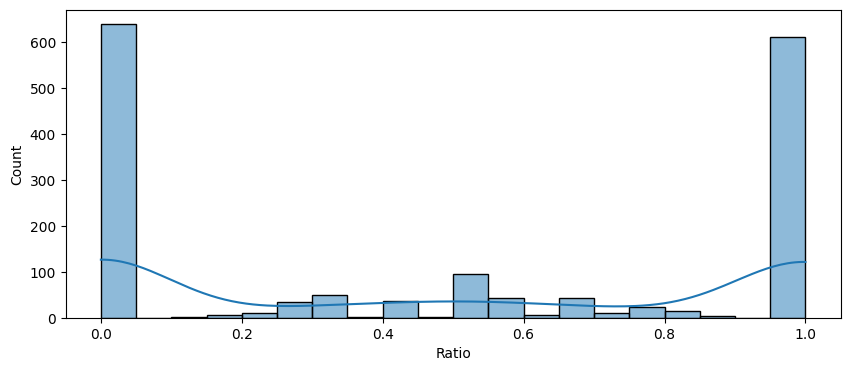

In [44]:
SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)

In [45]:
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


Cabin_side,P,S,Ratio
Surname,,,
Acobson,0.0,3.0,0.0
Acobsond,3.0,0.0,1.0
Adavisons,6.0,0.0,1.0
Admingried,0.0,4.0,0.0
Aginge,3.0,0.0,1.0


In [46]:
CS_bef=data['Cabin_side'].isna().sum()

SCS_gb.drop('Ratio', axis=1, inplace=True)

SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

data.drop('Surname', axis=1, inplace=True)

In [47]:
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 66


In [48]:
data['Cabin_side'].value_counts()


S    6504
P    6400
Name: Cabin_side, dtype: int64

In [49]:
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


In [50]:
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)

CD_bef=data['Cabin_deck'].isna().sum()

GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


In [51]:
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

In [52]:
CD_bef=data['Cabin_deck'].isna().sum()

na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

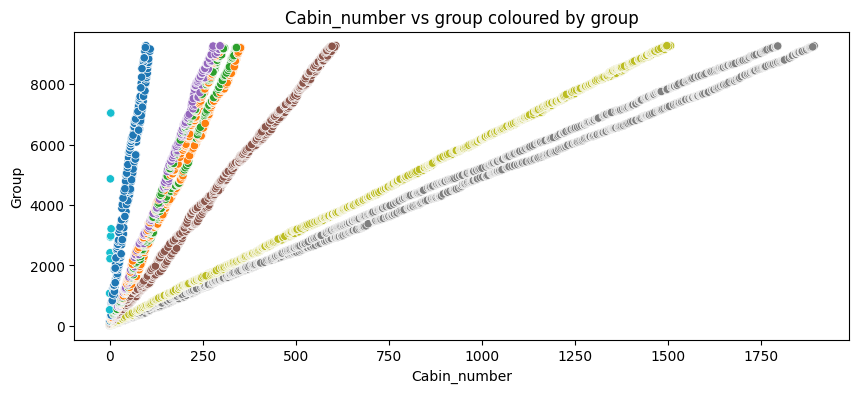

In [53]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

In [54]:
from sklearn.linear_model import LinearRegression
CN_bef=data['Cabin_number'].isna().sum()

for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

# Print number of missing values left
print('#Cabin_number missing values before:',CN_bef)
print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


In [55]:
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

In [56]:
data.loc[data['VIP'].isna(),'VIP']=False

In [57]:
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [58]:
A_bef=data[exp_feats].isna().sum().sum()

na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


In [59]:
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

In [60]:
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


In [61]:
CSL_bef=data['CryoSleep'].isna().sum()

na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


In [62]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [63]:
E_bef=data[exp_feats].isna().sum().sum()

for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


In [64]:
data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   724.902222   789.700555   841.093596   736.655773   
           1          0.0   693.014898   779.395942   795.420690   794.818627   
Europa     0          0.0  1153.160256  2652.013298  3534.668246  3975.774005   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1247.098361  1143.671916   
           1          0.0  1687.261538  1075.341146  1107.122677  1110.392045   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [65]:
E_bef=data[exp_feats].isna().sum().sum()

for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [66]:
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)

In [67]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
Group            0
Group_size       0
Solo             0
Expenditure      0
No_spending      0
Age_group        0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

In [68]:
X = data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test = data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

In [69]:
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number', 'Name'], axis=1, inplace=True)

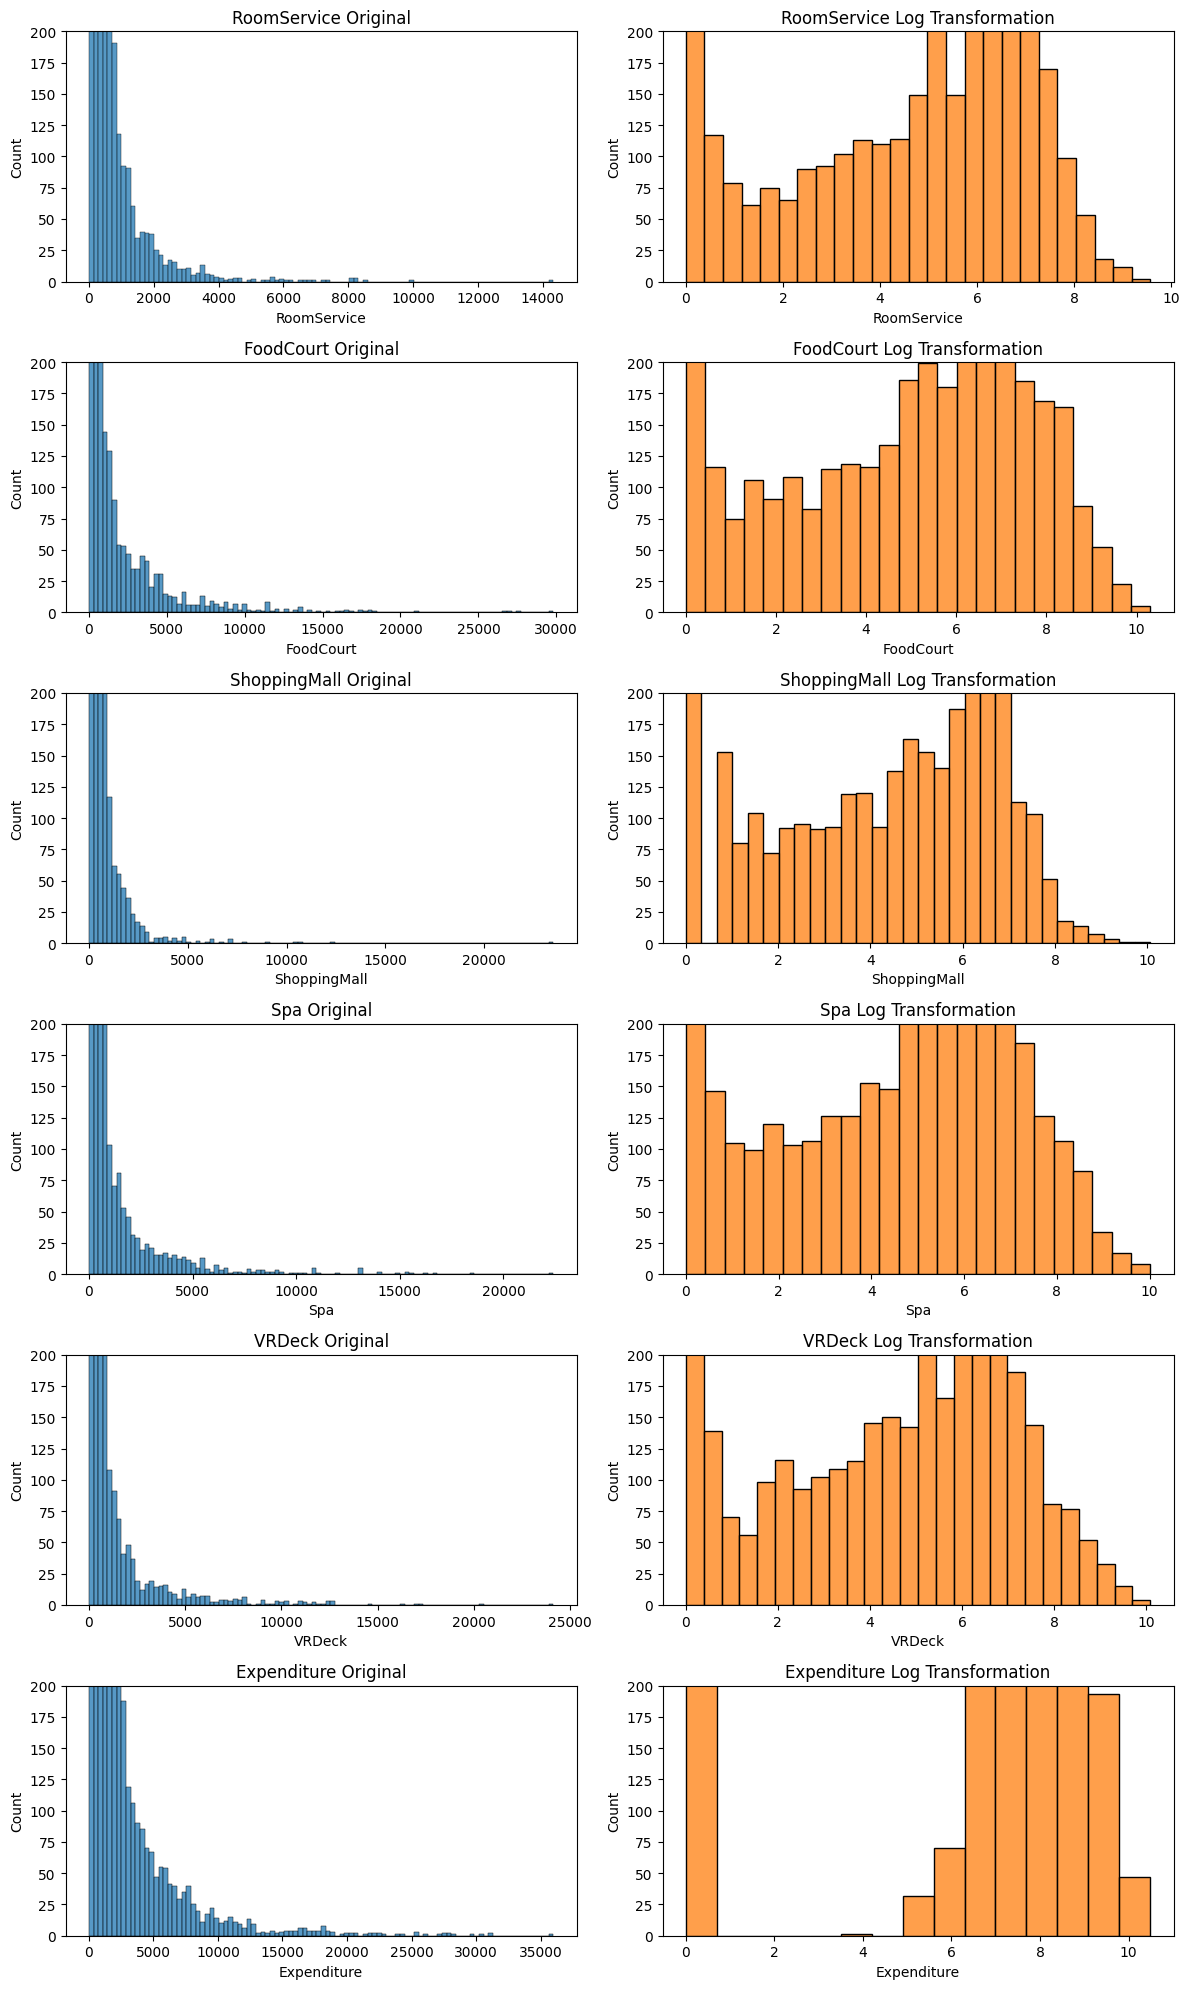

In [70]:
col_list = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(col_list):
    plt.subplot(6, 2, 2*i+1)
    sns.histplot(X[col], bins= 100)
    plt.ylim([0, 200])
    plt.title(f'{col} Original')

    plt.subplot(6, 2, 2*i+2)
    sns.histplot(np.log(X[col] + 1), color= 'C1')
    plt.ylim([0, 200])
    plt.title(f'{col} Log Transformation')
    plt.tight_layout()

In [71]:
for col in col_list:
    X[col] = np.log(1 + X[col])
    X_test[col] = np.log(1 + X_test[col])

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [73]:
numerical_cols = [col_name for col_name in X.columns if X[col_name].dtype in ['int64', 'float64']]
categorical_cols = [col_name for col_name in X.columns if X[col_name].dtype == 'object']

numerical_cols_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_cols_transformer = Pipeline(steps= [('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))])

ct = ColumnTransformer(
    transformers=[
        ('nums', numerical_cols_transformer, numerical_cols),
        ('cols', categorical_cols_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)
X_test = ct.transform(X_test)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state=0, stratify=y)

In [76]:
X_train.shape, X_valid.shape

((6954, 36), (1739, 36))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [112]:
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

lgbm_grid = {'num_leaves': [31],
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15],
        'objective': ['binary'],
        'metric': ['binary_logloss'],
        'max_depth': [5]
        }

catboost_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}


NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "LGBM" : lgbm_grid,
    "CatBoost" : catboost_grid,
    "NaiveBayes": NB_grid
}

In [113]:
from sklearn.model_selection import GridSearchCV
import time

In [114]:
i = 0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    clf.fit(X_train, y_train)
    valid_scores.iloc[i, 1]=clf.score(X_valid, y_valid)

    clf_best_params[key]=clf.best_params_
    
    stop = time.time()
    valid_scores.iloc[i, 2] = np.round((stop - start)/60, 2)
    i += 1

C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [115]:
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.769983,0.02
1,KNN,0.755607,0.01
2,SVC,0.793560,0.46
3,RandomForest,0.788959,0.27
4,LGBM,0.800460,0.07
5,CatBoost,0.808511,6.74
6,NaiveBayes,0.719379,0.00


In [116]:
clf_best_params

{'LogisticRegression': {'C': 0.75, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 150},
 'LGBM': {'learning_rate': 0.1,
  'max_depth': 5,
  'metric': 'binary_logloss',
  'n_estimators': 50,
  'num_leaves': 31,
  'objective': 'binary'},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150},
 'NaiveBayes': {'var_smoothing': 1e-07}}

In [140]:
best_clfs = {
    'LGBM': LGBMClassifier(**clf_best_params['LGBM'], random_state=0, verbose= -1),
    'catboost': CatBoostClassifier(**clf_best_params['CatBoost'], verbose=False, random_state=0)
}

In [135]:
from sklearn.model_selection import StratifiedKFold

In [141]:

FOLDS = 10
preds = np.zeros(len(X_test))
for key, classifier in best_clfs.items():
    start = time.time()
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)

    score = 0
    for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        clf = classifier
        clf.fit(X_train, y_train)

        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    score /= FOLDS
    stop = time.time()

    print(f'Model: {key}')
    print(f'Average validation score: {np.round((100*score), 2)}')
    print(f'Training Time(sec): {np.round((stop - start), 2)}')

preds=preds/(FOLDS*len(best_clfs))

Model: LGBM
Average validation score: 81.47
Training Time(sec): 0.43
Model: catboost
Average validation score: 81.26
Training Time(sec): 4.76


Text(0.5, 0, 'Probability')

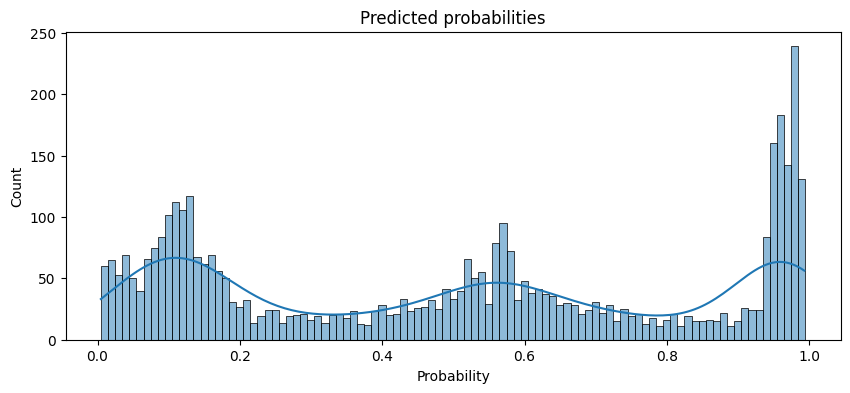

In [142]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

It is interesting to see that the models are either very confident or very unconfident but not much in between.

In [143]:
print(np.round(100*np.round(preds).sum()/len(preds),2))

52.75


Optimal threshold: 0.51


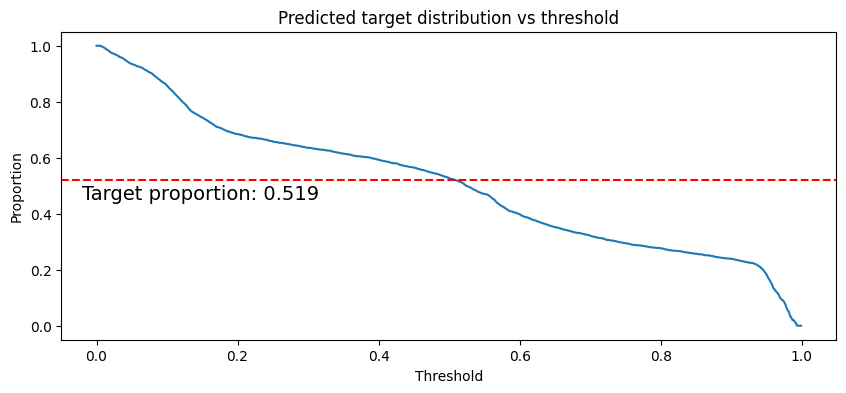

In [144]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [145]:
preds_tuned=(preds>=T_opt).astype(int)

Text(0.5, 1.0, 'Prediction distribution')

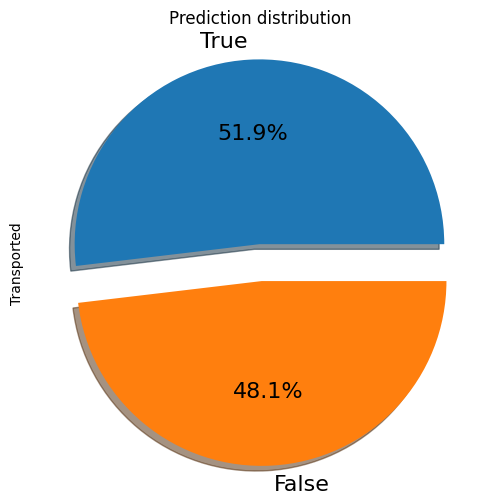

In [147]:
sub=pd.read_csv('spaceship-titanic/sample_submission.csv')

sub['Transported']=preds_tuned

sub=sub.replace({0:False, 1:True})

plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")